**Problem Statement 06 || Diabetes Prediction Project - Machine Learning Assignment Part 1**

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy, skew
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support, roc_auc_score
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

**1. Import Libraries/Dataset**

In [94]:
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/ACI_Assignment/Assignment1.csv")

# Justification:
# The necessary libraries are imported to handle data processing, feature engineering, model training, and evaluation.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2. Data Visualization and Exploration**

<h2><b>Display First Two rows</b></h2>

 Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia Genital thrush visual blurring Itching Irritability delayed healing partial paresis muscle stiffness Alopecia Obesity    class
  40   Male       No        Yes                 No      Yes         No             No              No     Yes           No             Yes              No              Yes      Yes     Yes Positive
  58   Male       No         No                 No      Yes         No             No             Yes      No           No              No             Yes               No      Yes      No Positive

********************************************************************************************************************************************************************************************************


<h2><b>DataSet Overview</b></h2>

Total Rows: 520
Total Columns: 17

Column Data Types:
       Column Name Data Type
               Age     int64
            Gender    object
          Polyuria    object
        Polydipsia    object
sudden weight loss    object
          weakness    object
        Polyphagia    object
    Genital thrush    object
   visual blurring    object
           Itching    object
      Irritability    object
   delayed healing    object
   partial paresis    object
  muscle stiffness    object
          Alopecia    object
           Obesity    object
             class    object

Numerical Feature Statistics:
              Age
count  520.000000
mean    48.028846
std     12.151466
min     16.000000
25%     39.000000
50%     47.500000
75%     57.000000
max     90.000000

********************************************************************************************************************************************************************************************************


<h2><b>Data Visualization</b></h2>

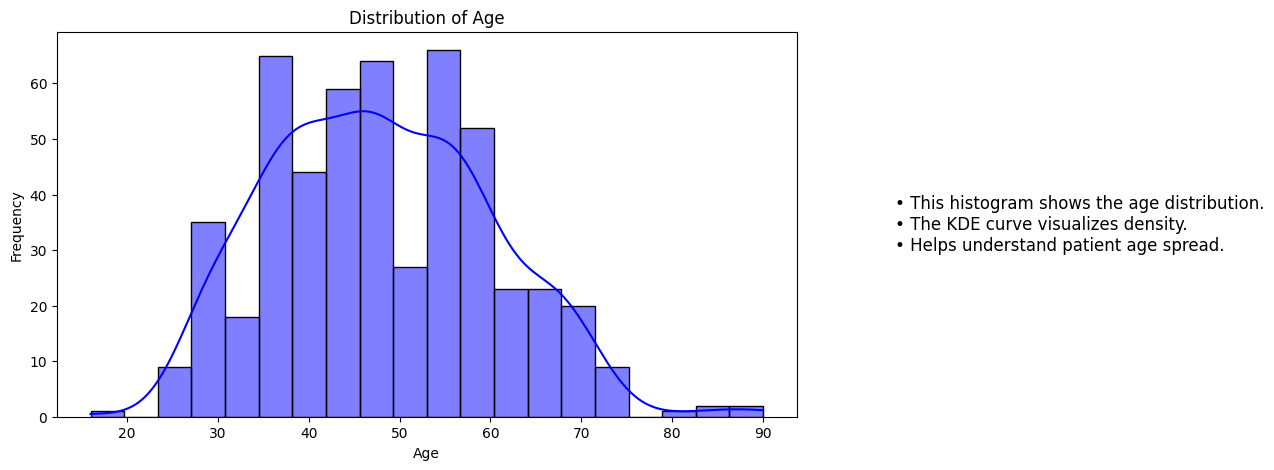

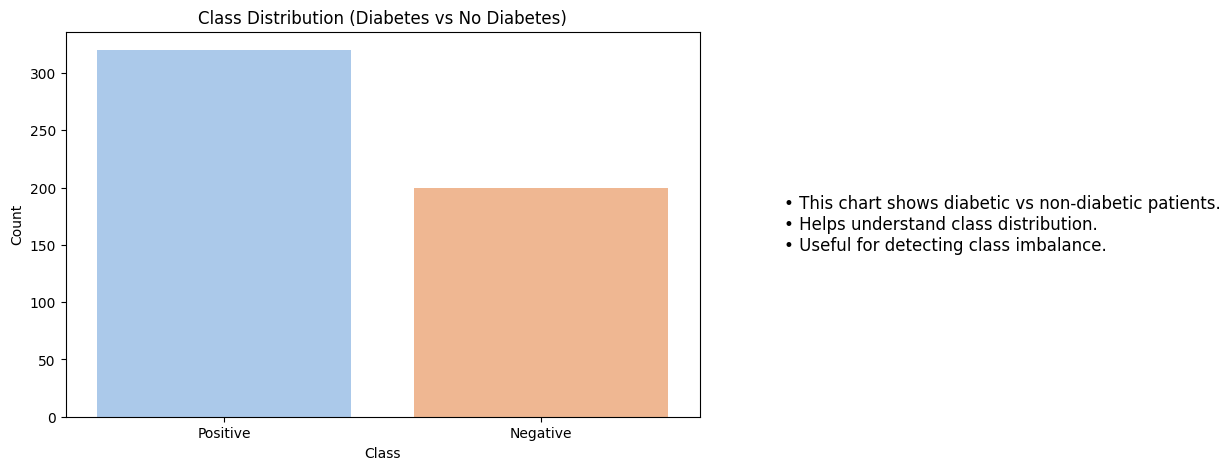

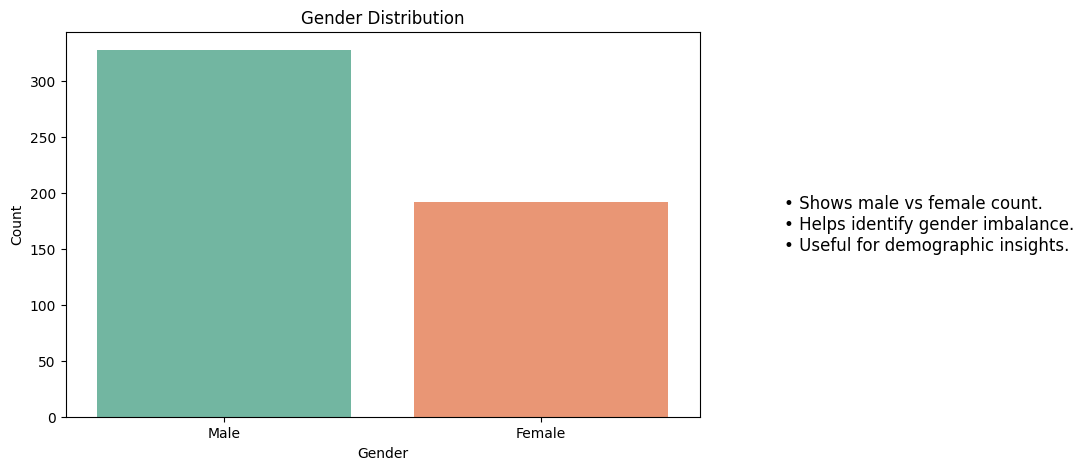

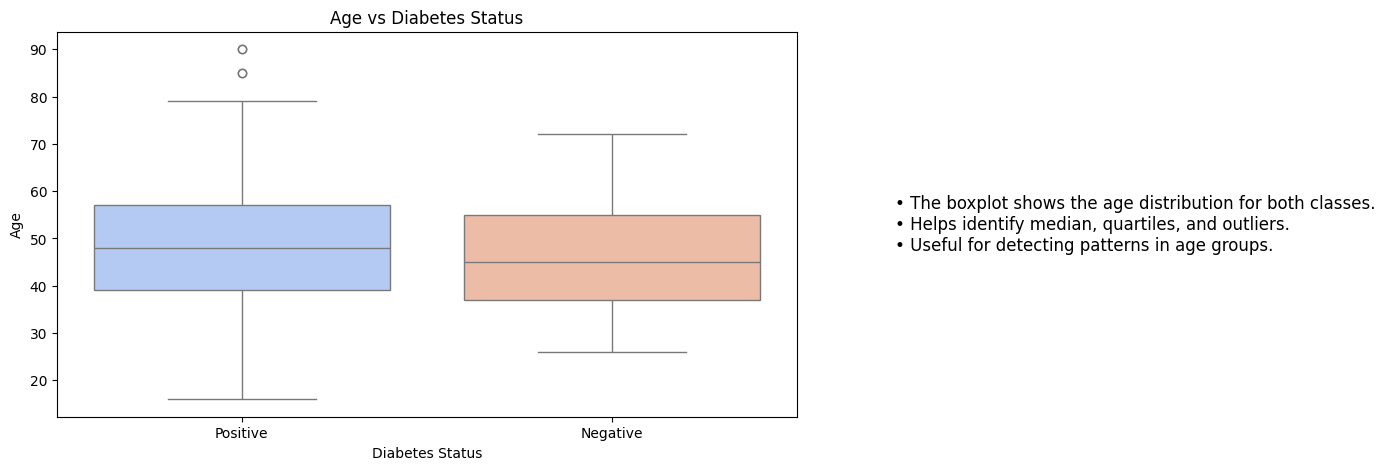


********************************************************************************************************************************************************************************************************


<h2><b>Correlation Analysis</b></h2>

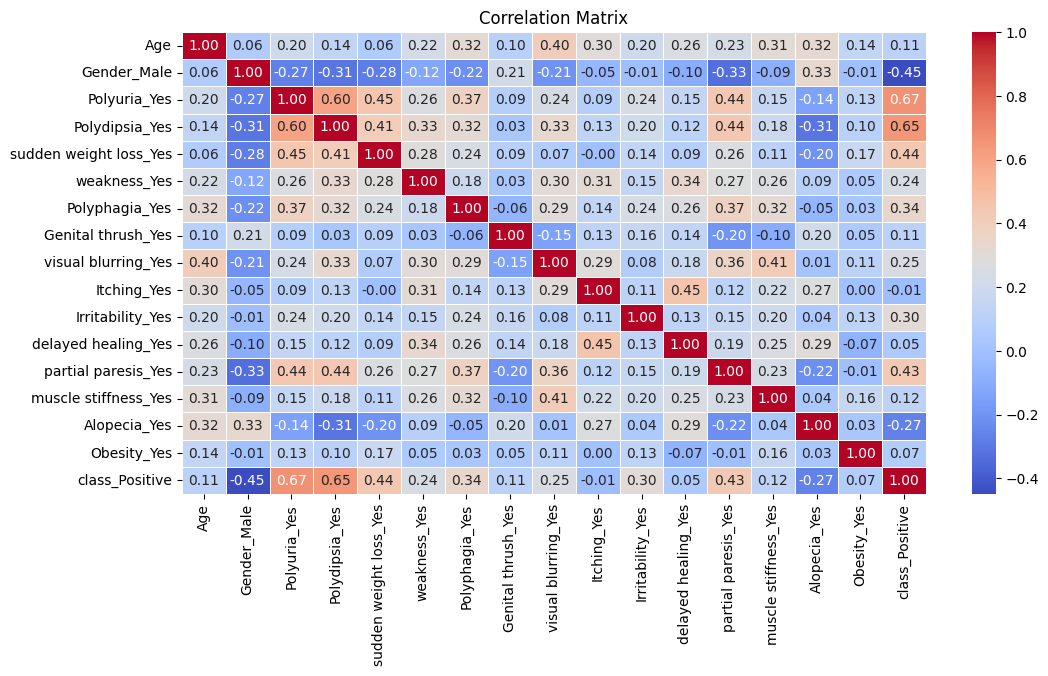


Justification for Correlation Analysis
- The correlation matrix helps us identify highly correlated features.
- If two features are strongly correlated (close to 1 or -1), one may be redundant and can be removed.
- This analysis is important for feature selection in the next step because redundant features may not add new information.
- We will analyze which features have high correlation with the target variable ('class') and prioritize them.

✅ Data Visualization & Correlation Analysis Completed Successfully!!!


In [95]:
# Display first two rows
display(Markdown("<h2><b>Display First Two rows</b></h2>"))
print(df.head(2).to_string(index=False))
print('\n' + '*' * 200)
# DataSet Overview
display(Markdown("<h2><b>DataSet Overview</b></h2>"))
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}\n")
# Display column data types
print("\033[1mColumn Data Types:\033[0m")
column_info = df.dtypes.reset_index()
column_info.columns = ["Column Name", "Data Type"]
print(column_info.to_string(index=False))
# Display basic statistics for numerical columns
print("\n\033[1mNumerical Feature Statistics:\033[0m")
print(df.describe().to_string())
print('\n' + '*' * 200)

# Data Visualization - Explore Dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visualization - Explore Dataset
display(Markdown("<h2><b>Data Visualization</b></h2>"))

# Distribution of Age
fig, ax = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={'width_ratios': [3, 1]})

sns.histplot(df['Age'], bins=20, kde=True, color='blue', ax=ax[0])
ax[0].set_title("Distribution of Age")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Frequency")

ax[1].axis("off")
ax[1].text(0, 0.5,
    "• This histogram shows the age distribution.\n"
    "• The KDE curve visualizes density.\n"
    "• Helps understand patient age spread.",
    fontsize=12, verticalalignment='center')

plt.show()

# Count plot of Target Variable (Diabetes or Not)
fig, ax = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [3, 1]})

sns.countplot(x='class', data=df, hue='class', palette="pastel", legend=False, ax=ax[0])
ax[0].set_title("Class Distribution (Diabetes vs No Diabetes)")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Count")

ax[1].axis("off")
ax[1].text(0, 0.5,
    "• This chart shows diabetic vs non-diabetic patients.\n"
    "• Helps understand class distribution.\n"
    "• Useful for detecting class imbalance.",
    fontsize=12, verticalalignment='center')

plt.show()

# Count plot of Gender
fig, ax = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [3, 1]})

sns.countplot(x='Gender', data=df, hue='Gender', palette="Set2", legend=False, ax=ax[0])
ax[0].set_title("Gender Distribution")
ax[0].set_xlabel("Gender")
ax[0].set_ylabel("Count")

ax[1].axis("off")
ax[1].text(0, 0.5,
    "• Shows male vs female count.\n"
    "• Helps identify gender imbalance.\n"
    "• Useful for demographic insights.",
    fontsize=12, verticalalignment='center')

plt.show()

# Boxplot of Age by Class (Diabetes vs No Diabetes)
fig, ax = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={'width_ratios': [3, 1]})

sns.boxplot(x='class', y='Age', data=df, hue='class', palette="coolwarm", dodge=False, ax=ax[0])
ax[0].set_title("Age vs Diabetes Status")
ax[0].set_xlabel("Diabetes Status")
ax[0].set_ylabel("Age")
ax[0].legend([],[], frameon=False)  # Hide redundant legend

ax[1].axis("off")
ax[1].text(0, 0.5,
    "• The boxplot shows the age distribution for both classes.\n"
    "• Helps identify median, quartiles, and outliers.\n"
    "• Useful for detecting patterns in age groups.",
    fontsize=12, verticalalignment='center')

plt.show()
print('\n' + '*' * 200)

display(Markdown("<h2><b>Correlation Analysis</b></h2>"))

# Convert categorical variables into numerical for correlation analysis
df_corr = df.copy()
df_corr = pd.get_dummies(df_corr, drop_first=True)

# Compute correlation matrix
correlation_matrix = df_corr.corr()

# Heatmap of Correlation
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


#  Justification for Correlation Analysis
print("\n\033[1mJustification for Correlation Analysis\033[0m")
print("- The correlation matrix helps us identify highly correlated features.\n- If two features are strongly correlated (close to 1 or -1), one may be redundant and can be removed.\n- This analysis is important for feature selection in the next step because redundant features may not add new information.\n- We will analyze which features have high correlation with the target variable ('class') and prioritize them.")
print("\n✅ Data Visualization & Correlation Analysis Completed Successfully!!!")

**3. Data Pre-processing and Cleaning**


1. Identifying Missing Values 

🚨 Checking for Missing Values :
 Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

🔹 Total Missing Values: 0

✅ No missing values detected. Proceeding !!! 


📌 Justification: Missing values were handled using Information Gain, selecting the value that provides the highest information for classification.


2. Detecting and Handling Outliers


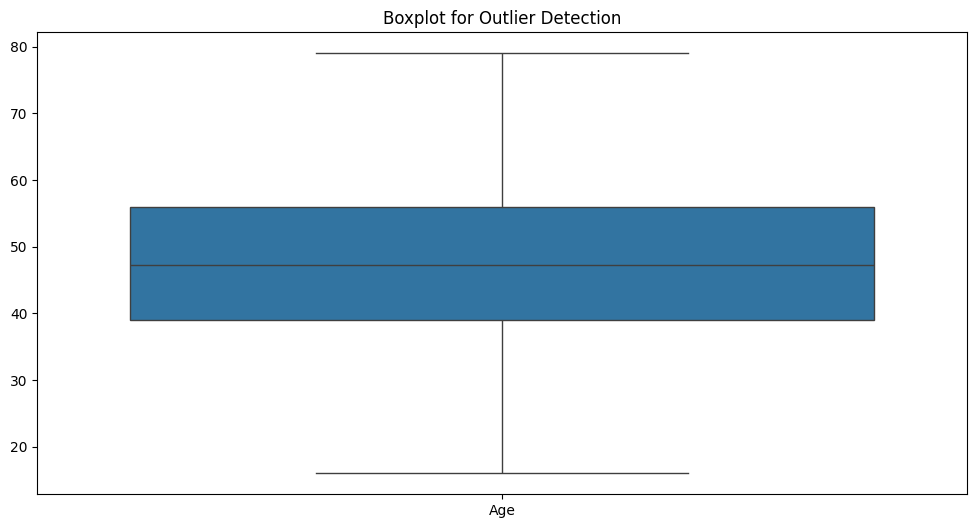


📊 Column: 'Age'
   - Q1 (25th percentile): 39.00
   - Q3 (75th percentile): 56.00
   - IQR: 17.00
   - Lower Bound: 13.50
   - Upper Bound: 81.50
✅ No significant outliers detected in 'Age'.

📌 Justification:
   - The Interquartile Range (IQR) method was used to detect and handle outliers.
   - Any values below the lower bound (Q1 - 1.5 * IQR) or above the upper bound (Q3 + 1.5 * IQR) were considered outliers.
   - Outliers were replaced with the median instead of the mean, as the median is more robust to extreme values.
   - This ensures that the dataset remains clean and does not introduce biases due to extreme values.

3. Handling Skewed Data

Skewness Before Handling:
 Age    0.148575
dtype: float64
✅ No significant skewness in 'Age'.

📌 Justification: Log transformation was applied to highly skewed data (|skewness| > 1) to make the distribution more normal, improving model performance.


4. Feature Engineering - Standardization & Normalization

✅ Standardization applied successfu

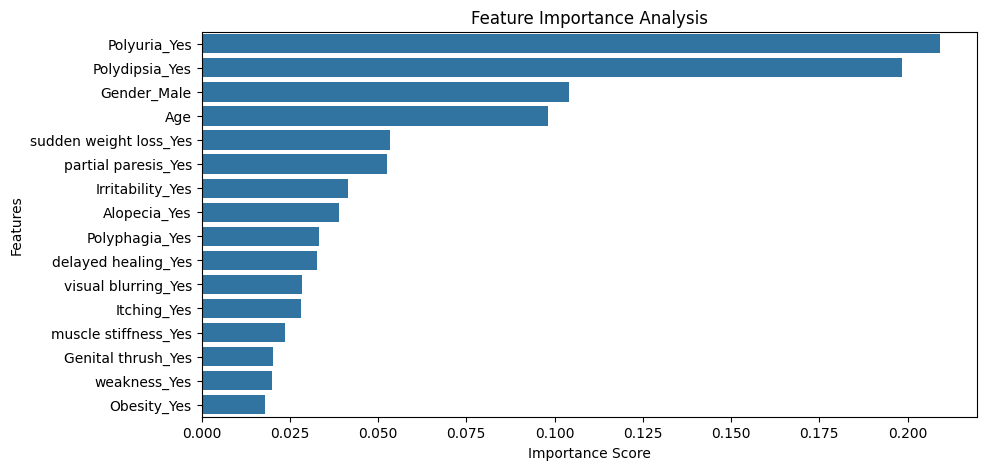


✅ Feature importance analysis completed.

📌 Justification: Feature importance helps in selecting the most relevant features for model training, reducing dimensionality and improving accuracy. We use RandomForest to evaluate the importance of each feature.

✅ Final Data Preprocessing Completed Successfully!

********************************************************************************************************************************************************************************************************


In [97]:
# Data Pre-processing and Cleaning

# ------------ Identifying NULL or Missing Values -----------------
print("\n\033[1m1. Identifying Missing Values \033[0m")
missing_values = df.isnull().sum()
print("\n🚨 Checking for Missing Values :\n", missing_values)
total_missing_before = missing_values.sum()
print(f"\n🔹 Total Missing Values: {total_missing_before}")

if total_missing_before == 0:
    print("\n✅ No missing values detected. Proceeding !!! \n")
else:
    print("\n🔄 Handling missing values using Information Gain...\n")

# Function to calculate entropy
def calculate_entropy(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return entropy(probabilities, base=2)

# Function to calculate information gain
def information_gain(df, feature, target):
    total_entropy = calculate_entropy(df[target])
    values = df[feature].dropna().unique()
    weighted_entropy = sum(
        (len(df[df[feature] == v]) / len(df)) * calculate_entropy(df[df[feature] == v][target]) for v in values
    )
    return total_entropy - weighted_entropy

# Handling missing values using Information Gain
for col in df.columns:
    if df[col].isnull().sum() > 0:
        unique_values = df[col].dropna().unique()
        best_value = max(unique_values, key=lambda v: information_gain(df.fillna({col: v}), col, 'class'))
        df[col].fillna(best_value, inplace=True)
        print(f"✅ Replaced missing values in '{col}' with: {best_value}")

print("\n📌 Justification: Missing values were handled using Information Gain, selecting the value that provides the highest information for classification.\n")

# ------------- Handling Outliers -----------------
print("\n\033[1m2. Detecting and Handling Outliers\033[0m")

# Selecting numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns

# Visualizing outliers using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_features])
plt.title("Boxplot for Outlier Detection")
plt.show()

# Handling outliers using IQR method
for col in numeric_features:
    Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Calculating lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifying outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\n📊 Column: '{col}'")
    print(f"   - Q1 (25th percentile): {Q1:.2f}")
    print(f"   - Q3 (75th percentile): {Q3:.2f}")
    print(f"   - IQR: {IQR:.2f}")
    print(f"   - Lower Bound: {lower_bound:.2f}")
    print(f"   - Upper Bound: {upper_bound:.2f}")

    if not outliers.empty:
        # Replacing outliers with the median value
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])
        print(f"⚠️ Outliers detected in '{col}' and replaced with the median value ({df[col].median():.2f}).")
    else:
        print(f"✅ No significant outliers detected in '{col}'.")

# Justification
print("\n📌 Justification:")
print("   - The Interquartile Range (IQR) method was used to detect and handle outliers.")
print("   - Any values below the lower bound (Q1 - 1.5 * IQR) or above the upper bound (Q3 + 1.5 * IQR) were considered outliers.")
print("   - Outliers were replaced with the median instead of the mean, as the median is more robust to extreme values.")
print("   - This ensures that the dataset remains clean and does not introduce biases due to extreme values.")

# ---------------------- Handling Skewness ------------------------------
print("\n\033[1m3. Handling Skewed Data\033[0m")
skewness_values = df[numeric_features].apply(lambda x: skew(x))
print("\nSkewness Before Handling:\n", skewness_values)

for col in numeric_features:
    if abs(skewness_values[col]) > 1:
        df[col] = np.log1p(df[col])
        print(f"⚠️ Skewed feature detected: '{col}', applied log transformation.")
    else:
        print(f"✅ No significant skewness in '{col}'.")

print("\n📌 Justification: Log transformation was applied to highly skewed data (|skewness| > 1) to make the distribution more normal, improving model performance.\n")

# --------- Feature Engineering - Standardization & Normalization---------------
print("\n\033[1m4. Feature Engineering - Standardization & Normalization\033[0m")

# Standardization
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numeric_features] = scaler.fit_transform(df[numeric_features])
print("\n✅ Standardization applied successfully.")

# Normalization
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_features] = scaler.fit_transform(df[numeric_features])
print("\n✅ Normalization applied successfully.")

print("\n📌 Justification: Standardization (Z-score) ensures all features have mean 0 and variance 1, while Normalization (Min-Max scaling) scales values between 0 and 1, improving model convergence.\n")

#----------------------- Feature Importance Analysis ---------------------------
print("\n\033[1mStep 5: Feature Importance Analysis\033[0m")
X = df.drop(columns=['class'])
y = df['class']

# Convert categorical variables
X = pd.get_dummies(X, drop_first=True)

model = RandomForestClassifier()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance Analysis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

print("\n✅ Feature importance analysis completed.")
print("\n📌 Justification: Feature importance helps in selecting the most relevant features for model training, reducing dimensionality and improving accuracy. We use RandomForest to evaluate the importance of each feature.")
print("\n✅ \033[1mFinal Data Preprocessing Completed Successfully!\033[0m")
print("\n" + "*" * 200)

**4. Model Building**

In [98]:
# Step 1: Splitting the Dataset into Training and Test Sets
print("\n\033[1m Step 1: Splitting the Dataset\033[0m")

# Convert categorical variables into dummy/encoded values
X = df.drop(columns=['class'])  # Features
y = df['class']  # Target variable
X = pd.get_dummies(X, drop_first=True)  # Encode categorical features

# Default split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("\n✅ Default Split: Train = 80%, Test = 20% completed successfully.")

# Justification:
print("\n📌 Justification:")
print("   - The dataset is split into 80% training and 20% testing, which is a standard practice in machine learning.")
print("   - This ensures that the model is trained on a sufficient amount of data while still having enough unseen data to evaluate performance.")
print("   - A random state of 42 is used to maintain consistency in results.")

# Trying different split ratios
splits = [0.25, 0.30]  # 75-25 and 70-30 splits
for split in splits:
    X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=split, random_state=42)
    print(f"✅ Split {100 - (split * 100)}%-{split * 100}% completed successfully.")

# 📌 Justification:
print("\n📌 Justification for Additional Splits:")
print("- Different train-test splits (75-25 and 70-30) were also tried to analyze the effect of dataset division on model performance.")
print("- A higher training proportion (e.g., 80%) generally helps in better model learning, while a larger test set (e.g., 30%) provides a more robust evaluation.")


# Step 2: Model Building - Logistic Regression
print("\n\033[1m Step 2: Building Logistic Regression Model\033[0m")

# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Evaluate Model
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"\n✅ Logistic Regression Accuracy: {accuracy_log_reg:.4f}")

print("\n Classification Report :\n", classification_report(y_test, y_pred_log_reg))

# 📌 Justification:
print("\n📌 Justification:")
print("- Logistic Regression is a simple and efficient model for binary classification problems.")
print("- It is used here as a baseline model to compare performance with more complex models.")
print("- The accuracy score and classification report provide insights into model effectiveness.")

# Step 3: Model Building - Decision Tree
print("\n\033[1m Step 3: Building Decision Tree Model\033[0m")

# Train Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Evaluate Model
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\n✅ Decision Tree Accuracy: {accuracy_dt:.4f}")

print("\n Classification Report :\n", classification_report(y_test, y_pred_dt))

# Justification:
print("\n📌 Justification:")
print("- Decision Tree Classifier is capable of capturing complex relationships in data.")
print("- Unlike logistic regression, it does not assume a linear relationship between input and output.")
print("- However, it may overfit if not properly tuned, making hyperparameter tuning necessary.")

# Step 4: Hyperparameter Tuning using Cross-Validation
print("\n\033[1m Step 4: Hyperparameter Tuning with Cross-Validation\033[0m")

# Define hyperparameters for tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters & score
print("\n✅ Best Parameters for Decision Tree:", grid_search.best_params_)
print(f"✅ Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Train with best parameters
best_dt = grid_search.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
print(f"\n✅ Tuned Decision Tree Accuracy: {accuracy_best_dt:.4f}")

# Justification:
print("\n📌 Justification for Hyperparameter Tuning:")
print("   - Hyperparameters such as max depth, min samples split, and min samples leaf were tuned using Grid Search with 5-fold Cross-Validation.")
print("   - Cross-validation ensures that the model generalizes well to unseen data and prevents overfitting.")
print("   - The best hyperparameters were selected based on the highest cross-validation accuracy.")
print("   - A deeper tree may capture more patterns but risks overfitting, while a shallower tree may generalize better.")


#  Final Check
print("\n✅ \033[1mModel Building Completed Successfully! ✅\033[0m")
print("\n" + "*" * 200)  # Separator for readability



 Step 1: Splitting the Dataset

✅ Default Split: Train = 80%, Test = 20% completed successfully.

📌 Justification:
   - The dataset is split into 80% training and 20% testing, which is a standard practice in machine learning.
   - This ensures that the model is trained on a sufficient amount of data while still having enough unseen data to evaluate performance.
   - A random state of 42 is used to maintain consistency in results.
✅ Split 75.0%-25.0% completed successfully.
✅ Split 70.0%-30.0% completed successfully.

📌 Justification for Additional Splits:
- Different train-test splits (75-25 and 70-30) were also tried to analyze the effect of dataset division on model performance.
- A higher training proportion (e.g., 80%) generally helps in better model learning, while a larger test set (e.g., 30%) provides a more robust evaluation.

 Step 2: Building Logistic Regression Model

✅ Logistic Regression Accuracy: 0.9135

 Classification Report :
               precision    recall  f1-sco

**5. Performance Evaluation**

In [99]:
print("\n\033[1m Performance Evaluation\033[0m")

# Import necessary libraries for evaluation
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Convert categorical target variable to binary (if needed)
y_test_binary = y_test.map({'Positive': 1, 'Negative': 0})  # Convert actual labels to 1/0

# Define a function to evaluate models
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label='Positive', average='binary')
    recall = recall_score(y_true, y_pred, pos_label='Positive', average='binary')
    f1 = f1_score(y_true, y_pred, pos_label='Positive', average='binary')

    # Convert predictions to binary format for AUC calculation
    y_pred_binary = np.where(y_pred == "Positive", 1, 0)

    roc_auc = roc_auc_score(y_true, y_pred_binary)

    print(f"\n📊 Performance Metrics for {model_name}:")
    print(f"   - Accuracy: {accuracy:.4f}")
    print(f"   - Precision: {precision:.4f}")
    print(f"   - Recall: {recall:.4f}")
    print(f"   - F1-Score: {f1:.4f}")
    print(f"   - ROC-AUC Score: {roc_auc:.4f}")

# Evaluate Logistic Regression Model
evaluate_model("Logistic Regression", y_test, y_pred_log_reg)

# Evaluate Decision Tree Model
evaluate_model("Decision Tree", y_test, y_pred_dt)

#  Model Comparison & Insights
print("\n\033[1m Model Comparison & Insights\033[0m")

# 📌 Justification:
print("\n📌 Justification:")
print("   - Accuracy: Measures overall correctness, but may not be reliable for imbalanced data.")
print("   - Precision: Indicates how many predicted positive cases were actually positive.")
print("   - Recall: Measures how well the model captures actual positives, important for medical diagnosis.")
print("   - F1-Score: Harmonic mean of precision & recall, useful for imbalanced datasets.")
print("   - ROC-AUC Score: Evaluates the model's ability to differentiate between positive and negative cases.")

# Decision on Best Model
if accuracy_score(y_test, y_pred_log_reg) > accuracy_score(y_test, y_pred_dt):
    print("\n✅ Logistic Regression performed better in terms of accuracy.")
    print("   - Logistic Regression is a simpler model that generalizes well and avoids overfitting.")
    print("   - It performs well when the relationship between features and target is linear.")
    print("   - However, it may not capture complex relationships in the data.")
else:
    print("\n✅ Decision Tree performed better in terms of accuracy.")
    print("   - Decision Tree can handle non-linearity and capture complex patterns.")
    print("   - However, it is more prone to overfitting, especially without proper pruning or hyperparameter tuning.")

print("\n📌 Conclusion :")
print("   - If interpretability & generalization are priorities → Logistic Regression is preferred.")
print("   - If capturing complex relationships is needed → Decision Tree can be beneficial.")

# Final Check
print("\n✅ \033[1mPerformance Evaluation Completed Successfully! ✅\033[0m")
print("\n" + "*" * 200)



 Performance Evaluation

📊 Performance Metrics for Logistic Regression:
   - Accuracy: 0.9135
   - Precision: 0.9306
   - Recall: 0.9437
   - F1-Score: 0.9371
   - ROC-AUC Score: 0.8961

📊 Performance Metrics for Decision Tree:
   - Accuracy: 0.9712
   - Precision: 1.0000
   - Recall: 0.9577
   - F1-Score: 0.9784
   - ROC-AUC Score: 0.9789

 Model Comparison & Insights

📌 Justification:
   - Accuracy: Measures overall correctness, but may not be reliable for imbalanced data.
   - Precision: Indicates how many predicted positive cases were actually positive.
   - Recall: Measures how well the model captures actual positives, important for medical diagnosis.
   - F1-Score: Harmonic mean of precision & recall, useful for imbalanced datasets.
   - ROC-AUC Score: Evaluates the model's ability to differentiate between positive and negative cases.

✅ Decision Tree performed better in terms of accuracy.
   - Decision Tree can handle non-linearity and capture complex patterns.
   - However, it

**Problem Statement 06 || Diabetes Prediction Project - Machine Learning Assignment Part 2**

**1. Implementing Models**

In [100]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Dictionary to store evaluation results
results = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Convert labels if necessary
    y_test_bin = y_test.map({'Positive': 1, 'Negative': 0})  # Convert to binary for ROC-AUC
    y_pred_bin = np.where(y_pred == 'Positive', 1, 0)  # Convert predictions to binary

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Positive', average='binary')
    recall = recall_score(y_test, y_pred, pos_label='Positive', average='binary')
    f1 = f1_score(y_test, y_pred, pos_label='Positive', average='binary')
    roc_auc = roc_auc_score(y_test_bin, y_pred_bin)

    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }

    # Print model performance

    print(f"\n\033[1m{name} Performance:\033[0m")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("ROC-AUC:", roc_auc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\n" + "*" * 200)



Logistic Regression Performance:
Accuracy: 0.9134615384615384
Precision: 0.9305555555555556
Recall: 0.9436619718309859
F1-Score: 0.9370629370629371
ROC-AUC: 0.8960734101579173

Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.85      0.86        33
    Positive       0.93      0.94      0.94        71

    accuracy                           0.91       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.91      0.91       104


********************************************************************************************************************************************************************************************************

Decision Tree Performance:
Accuracy: 0.9711538461538461
Precision: 0.9857142857142858
Recall: 0.971830985915493
F1-Score: 0.9787234042553191
ROC-AUC: 0.9707639778062315

Classification Report:
               precision    recall  f1-score   support

    Negative       

**2. Performance Comparison and Visualization**

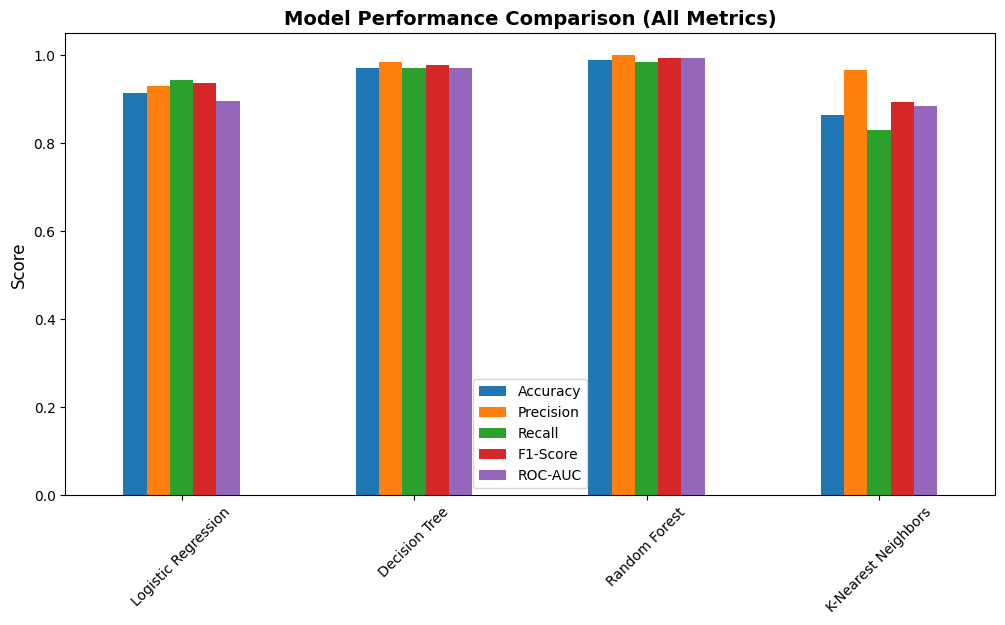

In [101]:
# Convert results dictionary to DataFrame for visualization
results_df = pd.DataFrame(results).T

# Create a new figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart directly on the given axis
results_df.plot(kind='bar', ax=ax)

# Set title, labels, and legend
ax.set_title("Model Performance Comparison (All Metrics)", fontsize=14, fontweight='bold')
ax.set_ylabel("Score", fontsize=12)
ax.set_xticklabels(results_df.index, rotation=45, fontsize=10)
ax.legend(loc='best', fontsize=10)

# Display the plot
plt.show()


**3. Best Model Selection and Justification**

In [102]:
# Identify the best model based on F1-Score
best_model = results_df["F1-Score"].idxmax()
print(f"\n✅ The best model is {best_model} based on the highest F1-Score, indicating a balance between Precision and Recall, making it the most suitable model for predicting.")

# Explanation of why this model is the best
explanation = {
    "Logistic Regression": """📌 Justification: Logistic Regression is a simple yet powerful algorithm, especially effective for binary classification.
    It provides clear interpretability by showing the relationship between independent variables and the target variable.
    However, it assumes a linear decision boundary, making it less suitable for complex, non-linear patterns.
    It performs best when the data is well-separated and follows a linear trend.""",

    "Decision Tree": """📌 Justification: Decision Trees are highly interpretable models that work well with both categorical and numerical data.
    They can learn complex decision boundaries and capture interactions between variables effectively.
    However, they are prone to overfitting, meaning they might memorize training data instead of generalizing well to unseen data.
    Hyperparameter tuning, such as limiting tree depth, helps mitigate overfitting.""",

    "Random Forest": """📌 Justification: Random Forest is an ensemble learning technique that combines multiple decision trees to improve accuracy and reduce overfitting.
    It is robust against noise, performs well on large datasets, and handles both linear and non-linear relationships.
    By aggregating multiple trees, it generalizes better than a single Decision Tree.
    However, it requires more computational power and is less interpretable than a single tree.""",

    "K-Nearest Neighbors": """📌 Justification: K-Nearest Neighbors (KNN) is a simple and intuitive algorithm that classifies a data point based on its closest neighbors.
    It is non-parametric, meaning it does not make assumptions about data distribution, making it highly flexible.
    However, KNN is computationally expensive for large datasets as it requires storing and searching through the entire dataset during prediction.
    It is also sensitive to irrelevant or redundant features, which can impact its performance."""
}

# Print the detailed justification
print(explanation[best_model])



✅ The best model is Random Forest based on the highest F1-Score, indicating a balance between Precision and Recall, making it the most suitable model for predicting.
📌 Justification: Random Forest is an ensemble learning technique that combines multiple decision trees to improve accuracy and reduce overfitting.
    It is robust against noise, performs well on large datasets, and handles both linear and non-linear relationships.
    By aggregating multiple trees, it generalizes better than a single Decision Tree.
    However, it requires more computational power and is less interpretable than a single tree.
